<a href="https://colab.research.google.com/github/russianopossum/Data_Science_homeworks/blob/lesson_4/%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_python_%D0%B4%D0%BB%D1%8F_data_science_%D1%80%D0%BE%D0%BC%D0%B0%D0%BD%D0%B5%D0%BD%D0%BA%D0%BE_%D0%B4%D0%B7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1.**
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
print(X.head())
Y = pd.DataFrame(boston['target'], columns=['price'])
print(Y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

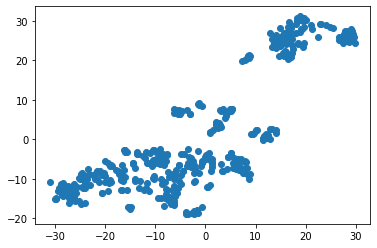

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

**Задание 2.**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
kmeans_train = kmeans.fit_predict(X_train_scaled)

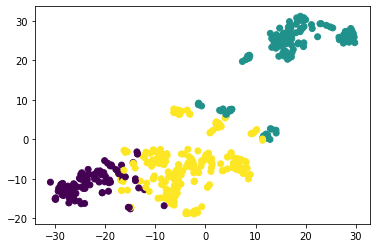

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans_train)
plt.show()

In [26]:
print('Цена, кластер 1:', Y_train[kmeans_train == 0].mean())
print('Цена, кластер 2:', Y_train[kmeans_train == 1].mean())
print('Цена, кластер 3:', Y_train[kmeans_train == 2].mean())
print('CRIM, кластер 1:', X_train['CRIM'][kmeans_train == 0].mean())
print('CRIM, кластер 2:', X_train['CRIM'][kmeans_train == 1].mean())
print('CRIM, кластер 2:', X_train['CRIM'][kmeans_train == 2].mean())

Цена, кластер 1: price    27.788372
dtype: float64
Цена, кластер 2: price    16.165354
dtype: float64
Цена, кластер 3: price    24.958115
dtype: float64
CRIM, кластер 1: 0.07356558139534884
CRIM, кластер 2: 10.797028425196851
CRIM, кластер 2: 0.4216602094240837


**Задание 3.**
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

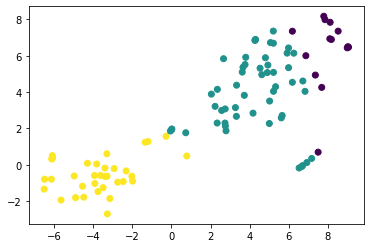

In [27]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
test= kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test)
plt.show()

In [14]:
print('CRIM, кластер 1:', X_test['CRIM'][test == 0].mean())
print('CRIM, кластер 2:', X_test['CRIM'][test == 1].mean())
print('CRIM, кластер 3:', X_test['CRIM'][test == 2].mean())

CRIM, кластер 1: 0.08618571428571427
CRIM, кластер 2: 0.25200716981132076
CRIM, кластер 3: 10.165531142857143
